## ***Problem Statement***

Try to predict the house price based the different parameters given.

## ***Import Libraries***

In [1]:
!pip install chart_studio

     |████████████████████████████████| 71kB 2.0MB/s 


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import plotly
import chart_studio.plotly as py
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
style.use('fivethirtyeight')

In [4]:
df = pd.read_csv('/content/housingdata.csv')

In [5]:
df.head()

,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


There are no column names mentioned, therefore it shows first entry of data as column names. Therefore we will read the file as follows

In [6]:
df = pd.read_csv('/content/housingdata.csv',header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


## ***Column name info:***

CRIM per capita crime rate by town

ZN proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS proportion of non-retail business acres per town

CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX nitric oxides concentration (parts per 10 million)

RM average number of rooms per dwelling

AGE proportion of owner-occupied units built prior to 1940

DIS weighted distances to five Boston employment centres

RAD index of accessibility to radial highways

TAX full-value property-tax rate per $10,000

PTRATIO pupil-teacher ratio by town

B [1000*(Bk - 0.63) ^ 2] where Bk is the proportion of blacks by town

LSTAT percentage lower status of the population

MEDV Median value of owner-occupied homes in $1000s

In [7]:
housing_colnames = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.columns = housing_colnames
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [9]:
df.shape

(506, 14)

## ***Exploratory Data Analysis***

In [10]:
def plotFeatures(col_list,title):
    plt.figure(figsize=(10, 14))
    i = 0
    print(len(col_list))
    for col in col_list:
        i+=1
        plt.subplot(7,2,i)
        plt.plot(df[col],df["MEDV"],marker='.',linestyle='none')
        plt.title(title % (col))   
        plt.tight_layout()

13


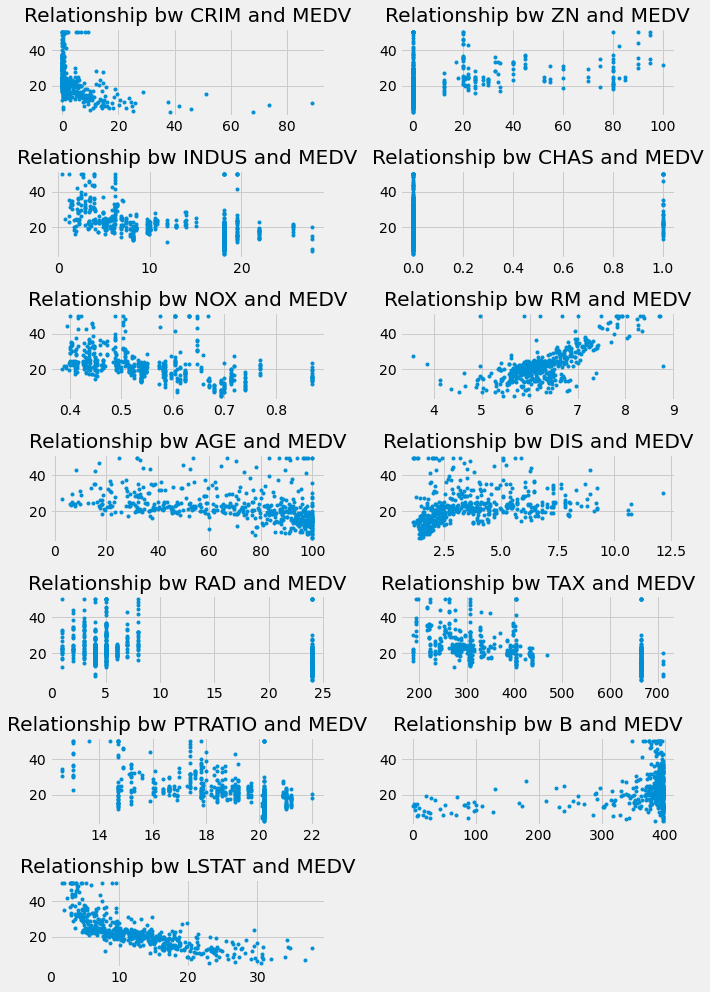

In [11]:
colnames = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
plotFeatures(colnames,"Relationship bw %s and MEDV")

From the above diagram we can see MEDV have linear relationship with RM

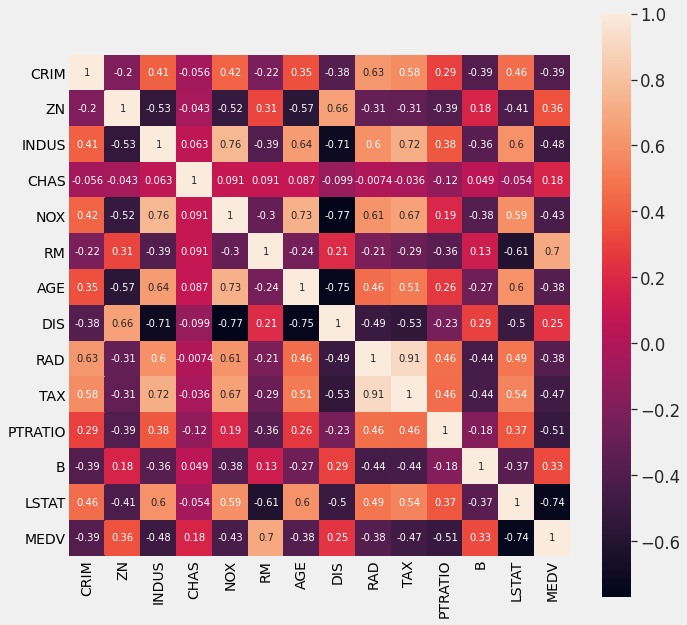

In [12]:
import seaborn as sns
fig = plt.subplots(figsize = (10,10))
sns.set(font_scale=1.5)
sns.heatmap(df.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 10})
plt.show()

RM is highly correlated with MEDV, therefore we will consider RM as our feature variable/independent variable. We will try to predict MEDV with RM.

### ***Prediction***

equation of line is :  y = mx+c

i.e. prediction = theta *  x + (y-intercept)

In [13]:
#theta * x
def predictPrice(x,theta):
  return np.dot(x,theta)

### ***Cost Function***

cost function is used to check how perfect our final values of theta predicts. This function actually shows the error our model is making while making predictions. Lower the cost function better is our prediction. Generally cost function of linear regression is Root Mean Square Error(RMSE). 1/2 which we have used in following code is for the convenience of gradient descent function which is used to calculate theta

We can measure the accuracy of our hypothesis function by using a cost function. This takes an average difference (actually a fancier version of an average) of all the results of the hypothesis with inputs from x's and the actual output y's.

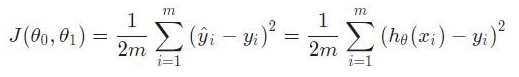


In [14]:
def calculateCost(x,theta,Y):
  prediction = predictPrice(x,theta)
  return ((prediction - Y)**2).mean()/2

Function which shows how the gradient descent works with every iteration

In [18]:
def abline(x,theta,Y):
  #plot line using slope and intercept
  y_vals = predictPrice(x,theta)
  plt.xlim(0, 20)
  plt.ylim(-10, 60)
  plt.xlabel('No. of Rooms in the house')
  plt.ylabel('Price of house')
  plt.gca().set_aspect(0.1, adjustable='datalim')
  plt.plot(x,Y,'.',x, y_vals, '-')
  plt.show()

### ***Gradient Descent***

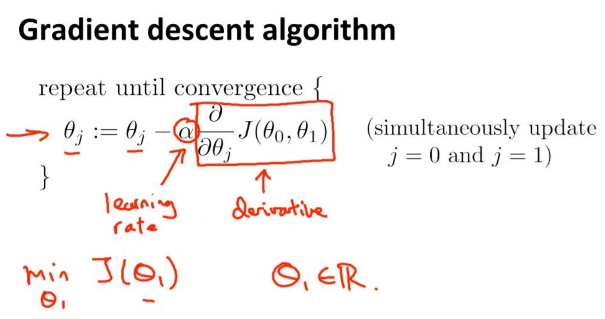

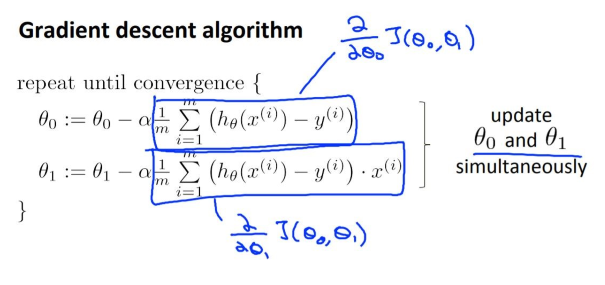

In [22]:
def GradientDescentLinearRegression(alpha=0.047,iter=5000):
  theta0 = []
  theta1 = []
  costs = []
  predictor = df['RM']
  x = np.column_stack((np.ones(len(predictor)),predictor))
  Y = df['MEDV']
  theta = np.zeros(2)
  for i in range(iter):

    #calculate the prediction and theta values for next prediction
    pred = predictPrice(x,theta)
    t0 = theta[0] - alpha * (pred - Y).mean()
    t1 = theta[1] - alpha * ((pred - Y)*x[:,1]).mean()

    theta = np.array([t0,t1])
    #now we have our updated theta we will check the cost function
    J = calculateCost(x,theta,Y)
    
    theta0.append(t0)
    theta1.append(t1)
    costs.append(J)

    #this will show how the line changes its position with updated theta values after every 1000 iteration
    if i % 1000 == 0:
      print(f"iteration = {i+1}, Cost = {J}, theta = {theta}")
      abline(x,theta,Y)
      print('\n')

  
  print(f'\n Final Values \ntheta0 = {t0} \ntheta1 = {t1} \n Cost = {J}')


iteration = 1, Cost = 258.0310838585916, theta = [1.0590419  6.86646571]


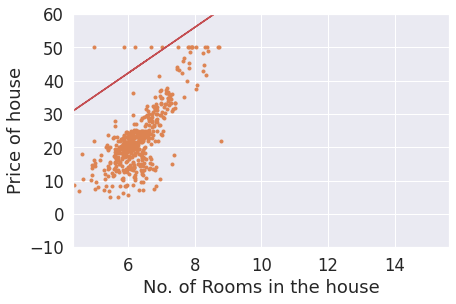



iteration = 1001, Cost = 24.266176819466, theta = [-14.66352286   5.95689176]


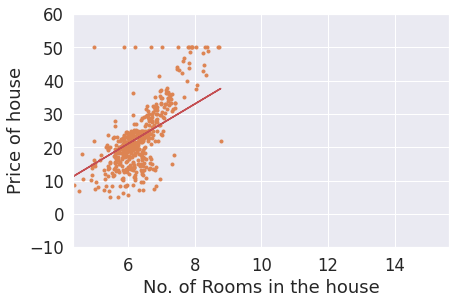



iteration = 2001, Cost = 22.596414573659313, theta = [-23.30244842   7.31497465]


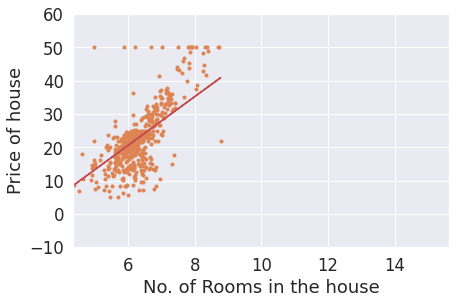



iteration = 3001, Cost = 22.057316548467956, theta = [-28.21114608   8.08664681]


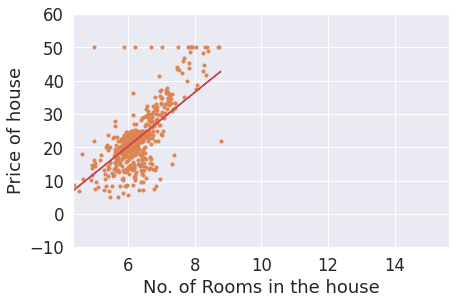



iteration = 4001, Cost = 21.8832638164128, theta = [-31.00030227   8.52511631]


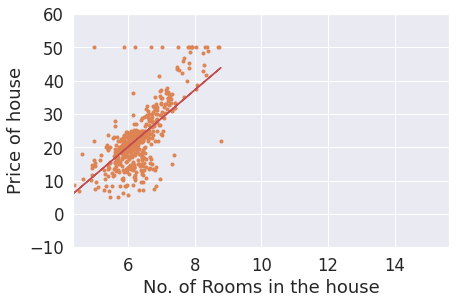




 Final Values 
theta0 = -32.58394104080308 
theta1 = 8.774072347924934 
 Cost = 21.827099606811213


In [23]:
GradientDescentLinearRegression()